In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
 split=["train[:70%]", "train[:30%]"], ## Train test split
 batch_size=-1,
 as_supervised=True, # Include labels
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_ds[0].shape

TensorShape([442, 1024, 3])

In [5]:
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [6]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [7]:
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [8]:
train_labels[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [11]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
base_model.trainable = False

In [13]:
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')
model = models.Sequential([
 base_model,
 flatten_layer,
 dense_layer_1,
 dense_layer_2,
 prediction_layer
])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'],
)

In [17]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

In [18]:
history = model.fit(train_ds, train_labels, epochs=1, validation_split=0.2, batch_size=32)

65/65 [==============================] - 675s 10s/step - loss: 1.5909 - accuracy: 0.4574 - val_loss: 1.0979 - val_accuracy: 0.5175


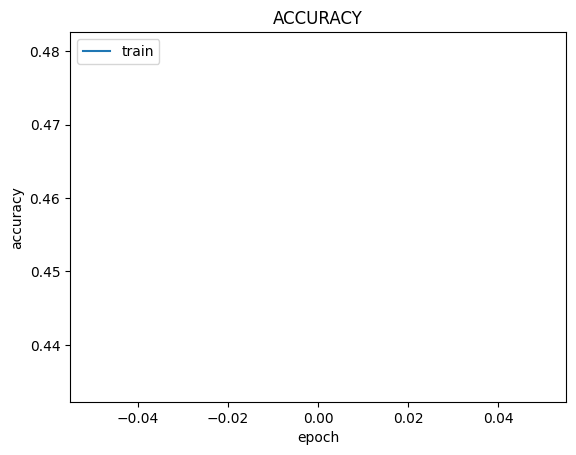

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [20]:
import numpy as np
import pandas as pd
y_pred = model.predict(test_ds)
y_classes = [np.argmax(element) for element in y_pred]
#to_categorical(y_classes, num_classes=5)
#to_categorical(test_labels, num_classes=5)
print(y_classes[:10])
print("\nTest")
print(test_labels[:10])

35/35 [==============================] - 272s 8s/step
[4, 3, 3, 3, 3, 3, 3, 3, 0, 4]

Test
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
